<div class="alert alert-block alert-success" align=center>
    <h1>REGRESSIONE LINEARE</h1>
</div>

<div class="alert alert-block alert-info" align = "center">
    <h2>Modello baseline</h2>
</div>

In questo notebook si va a creare il modello le cui predizioni verrano usate per fare un confronto con i futuri modelli. 

Il modello analizzato in questo notebook viene allenato e valutato solamente sul dataset iniziale e sul dataset iniziale senza outliers.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#SPLIT TRAIN E TEST (80 - 20)
from sklearn.model_selection import train_test_split

def split(dataframe):
    
    # Si toglie la colonna da predire
    X = dataframe.drop(columns=['Sale_Price'], axis =1)

    # Si isola la colonna da predire
    y = dataframe['Sale_Price']

    X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)
    
    return X_train_80, X_test, y_train_80, y_test

In [3]:
def divide(dataframe):
    
    # Si separano le features dal prezzo
    X_train = dataframe.drop(columns = ['Sale_Price'], axis = 1)
    
    y_train = dataframe['Sale_Price']
    
    return X_train, y_train

Si importa il dataset con outliers

In [4]:
df = pd.read_csv('dataset_enc.csv')

In [5]:
X_train_80, X_test, y_train_80, y_test = split(df)

Si importa il dataset iniziale privo di outliers

In [6]:
df_train_wo_out = pd.read_csv('training_wo_outliers.csv')

In [7]:
X_train_wo_out, y_train_wo_out = divide(df_train_wo_out)

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

def Linear_Regression(X_train, X_test, y_train, y_test):

    # Creazione del modello
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predizione sul modello
    y_pred_test = model.predict(X_test)
    
    # Calcolo dell'errore assoluto per il test-set
    MAE = mean_absolute_error(y_true = y_test, y_pred = y_pred_test)
    
    # Tabella differenze tra le y predette e quelle reali
    diff_y = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : y_pred_test, 'Difference' : abs(y_test - y_pred_test)})
    
    # Grafico 
    plt.scatter(y_test, y_pred_test)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    
    # Calcolo dello score
    score = r2_score(y_test, y_pred_test)
    
    return MAE, score, diff_y

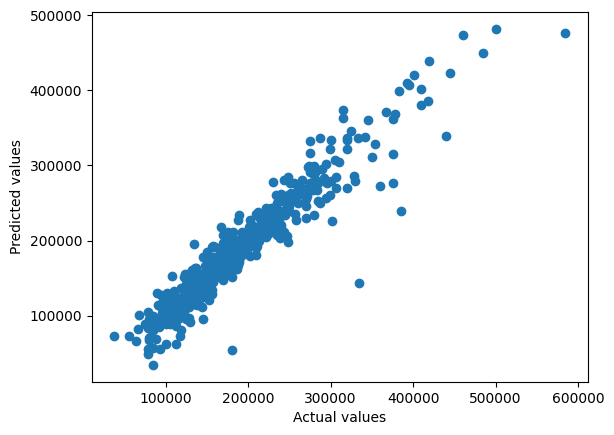

In [9]:
MAE_test, score, dataframe_diff = Linear_Regression(X_train_80, X_test, y_train_80, y_test)

In [10]:
print("Errore: ", MAE_test)
print("Score: ", score)

Errore:  14386.55068041978
Score:  0.9092450906354873


In [11]:
dataframe_diff

,Actual Value,Predicted Value,Difference
1955,135000,163219.783448,28219.783448
2652,139000,138279.268999,720.731001
2281,143000,125767.527356,17232.472644
1495,160500,157153.276622,3346.723378
2178,157000,173051.378596,16051.378596
...,...,...,...
222,137900,124713.798507,13186.201493
374,154000,169315.141136,15315.141136
2419,210250,193142.605152,17107.394848
993,165000,164389.591404,610.408596


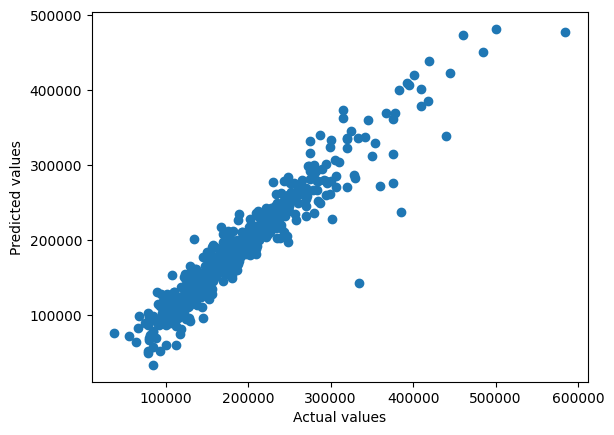

In [12]:
MAE_test_wo_out, score_wo_out, dataframe_diff_wo_out = Linear_Regression(X_train_wo_out, X_test, y_train_wo_out, y_test)

In [13]:
print("Errore: ", MAE_test_wo_out)
print("Score: ", score_wo_out)

Errore:  14303.372997928283
Score:  0.9129950131320684


In [14]:
dataframe_diff_wo_out

,Actual Value,Predicted Value,Difference
1955,135000,162120.692638,27120.692638
2652,139000,138501.126773,498.873227
2281,143000,126948.960779,16051.039221
1495,160500,155580.587217,4919.412783
2178,157000,172196.401416,15196.401416
...,...,...,...
222,137900,124644.593695,13255.406305
374,154000,170058.023689,16058.023689
2419,210250,192802.822735,17447.177265
993,165000,164468.193719,531.806281


In [15]:
print("L'errore sul dataset sporco con gli outliers è: ", MAE_test)
print("L'errore sul dataset sporco senza gli outliers è: ", MAE_test_wo_out)

L'errore sul dataset sporco con gli outliers è:  14386.55068041978
L'errore sul dataset sporco senza gli outliers è:  14303.372997928283


In [16]:
print("Lo score sul dataset sporco con gli outliers è: ", score)
print("Lo score sul dataset sporco senza gli outliers è: ", score_wo_out)

Lo score sul dataset sporco con gli outliers è:  0.9092450906354873
Lo score sul dataset sporco senza gli outliers è:  0.9129950131320684


<div class="alert alert-block alert-warning">
<b>Considerazioni finali</b>
</div>

Dato il miglior risultato sul dataset iniziale privo di outliers esso verrà tenuto in considerazione come modello di base da superare e migliorare.

Ora si crea un file csv per poi fare il confronto con i diversi modelli analizzati.

In [18]:
dataframe_confronto = pd.concat([X_test, dataframe_diff_wo_out], axis = 1)
dataframe_confronto.to_csv(r'df_confronto_LR.csv', index = False)